In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime
from datetime import date, timedelta
e_date = datetime.datetime.strptime('2020-06-20', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-04-01', '%Y-%m-%d')

data_path = 'D:/universidad/universidad 4/TFG/recursos para el desarrollo/datos procesados/OD'

In [2]:
delta = e_date - i_date

target_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    target_days.append(day)

In [3]:
def read_OD_fn(source_type):
    ods = {}
    for date in tqdm_notebook(target_days):
        od_date= pd.read_csv(os.path.join(data_path, 'date_{}_OD_{}.csv'.format(source_type,date.strftime('%Y-%m-%d'))), 
                            index_col=0)
        ods[date] = od_date
    return ods

In [4]:
ine_ods = read_OD_fn('INE')

  0%|          | 0/81 [00:00<?, ?it/s]

In [5]:
twt_ods = read_OD_fn('TWT')

  0%|          | 0/81 [00:00<?, ?it/s]

# Serializar los datos

In [6]:
lista_twt1 = []
lista_twt2 = []
lista_twt3 = []
lista_twt4 = []
lista_twt5 = []

for date in tqdm_notebook(target_days):
    lista_twt1.append(twt_ods[date].loc['11CA','total'])
    lista_twt2.append(twt_ods[date].loc['33PO','total'])
    lista_twt3.append(twt_ods[date].loc['026V','total'])
    lista_twt4.append(twt_ods[date].loc['21BU','total'])
    lista_twt5.append(twt_ods[date].loc['49GI','total'])
    
    
lista_ine1 = []
lista_ine2 = []
lista_ine3 = []
lista_ine4 = []
lista_ine5 = []

for date in tqdm_notebook(target_days):
    lista_ine1.append(ine_ods[date].loc['11CA','total'])
    lista_ine2.append(ine_ods[date].loc['33PO','total'])
    lista_ine3.append(ine_ods[date].loc['026V','total'])
    lista_ine4.append(ine_ods[date].loc['21BU','total'])
    lista_ine5.append(ine_ods[date].loc['49GI','total'])
    

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

In [7]:
df_twt1 = pd.DataFrame (lista_twt1, columns = ['Viajes'], index= target_days)
df_ine1 = pd.DataFrame (lista_ine1, columns = ['Viajes'], index= target_days)

df_twt2 = pd.DataFrame (lista_twt2, columns = ['Viajes'], index= target_days)
df_ine2 = pd.DataFrame (lista_ine2, columns = ['Viajes'], index= target_days)

df_twt3 = pd.DataFrame (lista_twt3, columns = ['Viajes'], index= target_days)
df_ine3 = pd.DataFrame (lista_ine3, columns = ['Viajes'], index= target_days)

df_twt4 = pd.DataFrame (lista_twt4, columns = ['Viajes'], index= target_days)
df_ine4 = pd.DataFrame (lista_ine4, columns = ['Viajes'], index= target_days)

df_twt5 = pd.DataFrame (lista_twt5, columns = ['Viajes'], index= target_days)
df_ine5 = pd.DataFrame (lista_ine5, columns = ['Viajes'], index= target_days)

In [8]:
lista_twt = []
lista_ine = []

df_twt = df_twt1 + df_twt2 + df_twt3 + df_twt4 + df_twt5
df_ine = df_ine1 + df_ine2 + df_ine3 + df_ine4 + df_ine5

In [9]:
df_twt.head()

,Viajes
2020-04-01,0
2020-04-02,2
2020-04-03,0
2020-04-04,0
2020-04-05,0


In [10]:
df_ine.head()

,Viajes
2020-04-01,194
2020-04-02,183
2020-04-03,317
2020-04-04,177
2020-04-05,142


In [11]:
del twt_ods
del ine_ods

# Visualización de datos

In [12]:
print(df_twt.index.min())
print(df_ine.index.max())

2020-04-01 00:00:00
2020-06-20 00:00:00


In [13]:
print(len(df_twt['2020']))

81


In [14]:
print(len(df_ine['2020']))

81


In [15]:
df_twt.describe()

,Viajes
count,81.000000
mean,0.407407
std,0.862812
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


In [16]:
df_ine.describe()

,Viajes
count,81.000000
mean,366.592593
std,108.663446
min,110.000000
25%,303.000000
50%,390.000000
75%,433.000000
max,614.000000


In [17]:
meses = df_twt.resample('M').mean()
meses

,Viajes
2020-04-30,0.366667
2020-05-31,0.387097
2020-06-30,0.500000


In [18]:
meses = df_ine.resample('M').mean()
meses

,Viajes
2020-04-30,276.233333
2020-05-31,402.096774
2020-06-30,447.100000


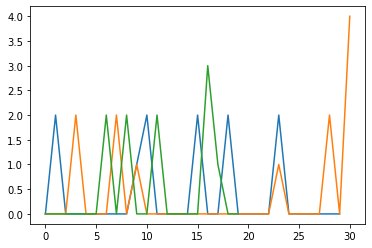

In [19]:
abril = df_twt['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_twt['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_twt['2020-06-01':'2020-06-20']
plt.plot(junio.values)

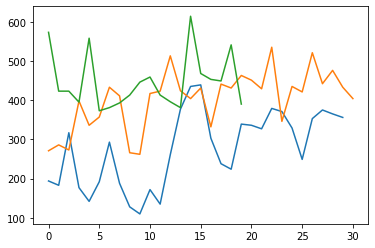

In [20]:
abril = df_ine['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_ine['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_ine['2020-06-01':'2020-06-20']
plt.plot(junio.values)

# Preprocesado de datos

In [21]:
# cantidad de dias previos que se usaran para predecir el siguiente dia 
look_back=7

# convertir series en conocimiento supervisado
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # secuencia de entrada (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # secuencia del pronostico (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # unimos todo
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # eliminamos todos los valores nulos
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# cargamos el dataframe en la variable values
values_twt = df_twt.values
values_ine = df_ine.values

# convertimos los enteros en floats
values_twt = values_twt.astype('float32')
values_ine = values_ine.astype('float32')

# normalizamos los datos a escala de entre -1 y 1
scaler = MinMaxScaler(feature_range=(-1, 1))
values_twt=values_twt.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
values_ine=values_ine.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled_twt = scaler.fit_transform(values_twt)
scaled_ine = scaler.fit_transform(values_ine)

# usamos la funcion definida previamente
reframed_twt = series_to_supervised(scaled_twt, look_back, 1)
reframed_ine = series_to_supervised(scaled_ine, look_back, 1)

#imprimimos los nuevos datos
reframed_twt.tail()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
76,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
77,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.5
78,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.5,-0.5
79,0.0,-1.0,-1.0,-1.0,-1.0,0.5,-0.5,-1.0
80,-1.0,-1.0,-1.0,-1.0,0.5,-0.5,-1.0,-1.0


In [22]:
#cambiamos el nombre de las columnas
reframed_ine.columns = ['var2(t-7)', 'var2(t-6)', 'var2(t-5)', 'var2(t-4)', 'var2(t-3)', 'var2(t-2)', 'var2(t-1)', 'var2(t)']
reframed_ine.tail()

,var2(t-7),var2(t-6),var2(t-5),var2(t-4),var2(t-3),var2(t-2),var2(t-1),var2(t)
76,0.202381,0.333333,0.384921,0.202381,0.134921,0.075397,1.000000,0.420635
77,0.333333,0.384921,0.202381,0.134921,0.075397,1.000000,0.420635,0.361111
78,0.384921,0.202381,0.134921,0.075397,1.000000,0.420635,0.361111,0.345238
79,0.202381,0.134921,0.075397,1.000000,0.420635,0.361111,0.345238,0.710318
80,0.134921,0.075397,1.000000,0.420635,0.361111,0.345238,0.710318,0.111111


In [23]:
#unimos los datos del ine con los de twitter
reframed = pd.concat([reframed_twt.iloc[:, 0], reframed_ine.iloc[:, 0]], axis=1)

for i in range(6):
    reframed = pd.concat([reframed, reframed_twt.iloc[:, i+1]], axis=1)
    reframed = pd.concat([reframed, reframed_ine.iloc[:, i+1]], axis=1)
    
reframed = pd.concat([reframed, reframed_ine.iloc[:, 7]], axis=1)

reframed.tail()

,var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var2(t)
76,0.0,0.202381,-1.0,0.333333,-1.0,0.384921,0.0,0.202381,-1.0,0.134921,-1.0,0.075397,-1.0,1.000000,0.420635
77,-1.0,0.333333,-1.0,0.384921,0.0,0.202381,-1.0,0.134921,-1.0,0.075397,-1.0,1.000000,-1.0,0.420635,0.361111
78,-1.0,0.384921,0.0,0.202381,-1.0,0.134921,-1.0,0.075397,-1.0,1.000000,-1.0,0.420635,0.5,0.361111,0.345238
79,0.0,0.202381,-1.0,0.134921,-1.0,0.075397,-1.0,1.000000,-1.0,0.420635,0.5,0.361111,-0.5,0.345238,0.710318
80,-1.0,0.134921,-1.0,0.075397,-1.0,1.000000,-1.0,0.420635,0.5,0.361111,-0.5,0.345238,-1.0,0.710318,0.111111


# Dividimos los datos en sets de entrenamiento y validacion

In [24]:
#dividimos nuestro valores entre sets de entrenamiento y de test
values = reframed.values
n_train_days = 71 - (10+look_back)
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features] - preguntar
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(54, 1, 14) (54,) (20, 1, 14) (20,)


# Creamos la red neuronal

In [25]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(look_back, input_shape=(1,look_back*2),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.30))
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.30))
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.30))
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.30))
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [26]:
EPOCHS=200

model = crear_modeloFF()

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=look_back)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 7)              105       
_________________________________________________________________
flatten (Flatten)            (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               800       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1

8/8 [==============================] - 0s 7ms/step - loss: 0.2116 - mse: 0.0658 - val_loss: 0.2988 - val_mse: 0.1520
Epoch 51/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1632 - mse: 0.0408 - val_loss: 0.3123 - val_mse: 0.1598
Epoch 52/200
8/8 [==============================] - 0s 7ms/step - loss: 0.2268 - mse: 0.0820 - val_loss: 0.3477 - val_mse: 0.1759
Epoch 53/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2455 - mse: 0.0834 - val_loss: 0.3581 - val_mse: 0.1849
Epoch 54/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2372 - mse: 0.0905 - val_loss: 0.3341 - val_mse: 0.1768
Epoch 55/200
8/8 [==============================] - 0s 7ms/step - loss: 0.2435 - mse: 0.0898 - val_loss: 0.3333 - val_mse: 0.1689
Epoch 56/200
8/8 [==============================] - 0s 7ms/step - loss: 0.2302 - mse: 0.0761 - val_loss: 0.3034 - val_mse: 0.1534
Epoch 57/200
8/8 [==============================] - 0s 7ms/step - loss: 0.2084 - mse: 0.0612 - val_loss

8/8 [==============================] - 0s 7ms/step - loss: 0.2150 - mse: 0.0693 - val_loss: 0.2999 - val_mse: 0.1483
Epoch 114/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1447 - mse: 0.0355 - val_loss: 0.3083 - val_mse: 0.1475
Epoch 115/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1770 - mse: 0.0499 - val_loss: 0.3199 - val_mse: 0.1570
Epoch 116/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1723 - mse: 0.0466 - val_loss: 0.3447 - val_mse: 0.1732
Epoch 117/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1622 - mse: 0.0456 - val_loss: 0.3400 - val_mse: 0.1779
Epoch 118/200
8/8 [==============================] - 0s 6ms/step - loss: 0.2056 - mse: 0.0751 - val_loss: 0.3398 - val_mse: 0.1748
Epoch 119/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1645 - mse: 0.0423 - val_loss: 0.3139 - val_mse: 0.1535
Epoch 120/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1723 - mse: 0.0527 - v

8/8 [==============================] - 0s 6ms/step - loss: 0.1580 - mse: 0.0431 - val_loss: 0.3169 - val_mse: 0.1507
Epoch 176/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1546 - mse: 0.0355 - val_loss: 0.3216 - val_mse: 0.1516
Epoch 177/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1544 - mse: 0.0376 - val_loss: 0.3159 - val_mse: 0.1483
Epoch 178/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1492 - mse: 0.0408 - val_loss: 0.3281 - val_mse: 0.1581
Epoch 179/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1342 - mse: 0.0310 - val_loss: 0.3224 - val_mse: 0.1546
Epoch 180/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1401 - mse: 0.0350 - val_loss: 0.3066 - val_mse: 0.1416
Epoch 181/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1487 - mse: 0.0403 - val_loss: 0.3209 - val_mse: 0.1533
Epoch 182/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1566 - mse: 0.0371 - v

# Visualizamos resultados

In [27]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


def compute_metrics_fn(y_valid_resc, y_hat_resc):
    mae_ = mean_absolute_error(y_valid_resc, y_hat_resc)
    mse_ = mean_squared_error(y_valid_resc, y_hat_resc)
    rmse_ = mean_squared_error(y_valid_resc, y_hat_resc, squared = False)
    cvrmse_ = rmse_/np.mean(y_valid_resc)*100
    mape_ = mape(y_valid_resc, y_hat_resc)
    
    return mae_, mse_, rmse_, cvrmse_, mape_

In [28]:
# hacemos las predicciones
trainPredict = model.predict(x_train)
testPredict = model.predict(x_val)

# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = y_train.reshape(y_train.shape[0], 1)
trainY_scalerInverse = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = y_val.reshape(y_val.shape[0], 1)
testY_scalerInverse = scaler.inverse_transform(testY)

In [29]:
# calculamos las metricas de error
trainScore_MAE, trainScore_MSE, trainScore_RMSE, trainScore_CVRMSE, trainScore_MAPE  =  compute_metrics_fn(trainY_scalerInverse, trainPredict)
print('Resultado del entrenamiento: %.2f MAE' % (trainScore_MAE))
print('Resultado del entrenamiento: %.2f MSE' % (trainScore_MSE))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore_RMSE))
print('Resultado del entrenamiento: %.2f CVRMSE' % (trainScore_CVRMSE))
print('Resultado del entrenamiento: %.2f MAPE \n' % (trainScore_MAPE))

testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(testY_scalerInverse, testPredict)
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del entrenamiento: 30.79 MAE
Resultado del entrenamiento: 1678.68 MSE
Resultado del entrenamiento: 40.97 RMSE
Resultado del entrenamiento: 11.49 CVRMSE
Resultado del entrenamiento: 10.30 MAPE 

Resultado del test: 83.42 MAE
Resultado del test: 10213.34 MSE
Resultado del test: 101.06 RMSE
Resultado del test: 22.60 CVRMSE
Resultado del test: 18.49 MAPE


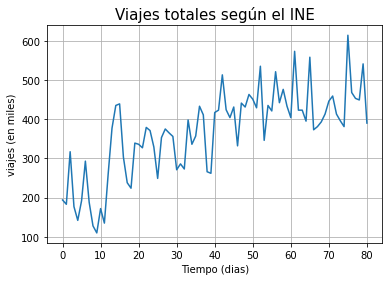

In [30]:
plt.plot(df_ine.values)
plt.grid(True)
plt.title("Viajes totales según el INE", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

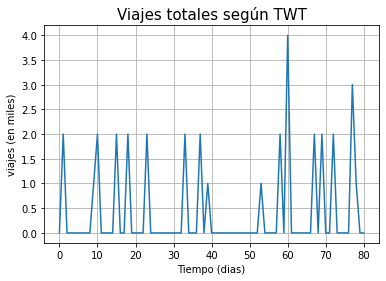

In [31]:
plt.plot(df_twt.values)
plt.grid(True)
plt.title("Viajes totales según TWT", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

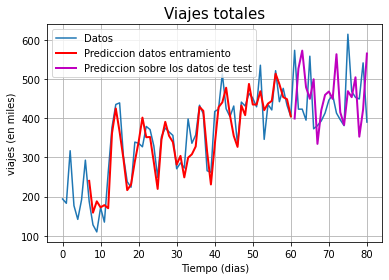

In [32]:
dataset = df_ine.values
dataset = dataset.astype('float32')
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones del test de cambio para plotear
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back):len(dataset), :] = testPredict
# plot baseline and predictions
plt.plot(df_ine.values)
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Viajes totales", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

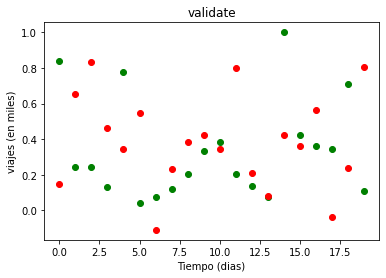

In [33]:
results=model.predict(x_val)

plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

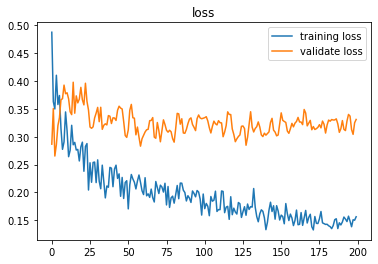

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend( ('training loss', 'validate loss'), loc = 'upper right')
plt.show()

# Prediccion a futuro

In [35]:
# usaremos los 14 ultimos dias del confinamiento en junio para predecir como habrian sido los dias del 21 al 27 en caso de que
# el confinamiento se hubiese alargado por una semana mas

ultimosDias_twt = df_twt['2020-6-7':'2020-6-20']
ultimosDias_ine = df_ine['2020-6-7':'2020-6-20']
ultimosDias_twt

,Viajes
2020-06-07,2
2020-06-08,0
2020-06-09,2
2020-06-10,0
2020-06-11,0
2020-06-12,2
2020-06-13,0
2020-06-14,0
2020-06-15,0
2020-06-16,0


# Preparamos los datos para el test

In [36]:
# cargamos el dataframe en la variable values
values_twt = ultimosDias_twt.values
values_ine = ultimosDias_ine.values

# convertimos los enteros en floats
values_twt = values_twt.astype('float32')
values_ine = values_ine.astype('float32')

# normalizamos los datos a escala de entre -1 y 1
values_twt =values_twt.reshape(-1, 1)
scaled_twt = scaler.fit_transform(values_twt)
values_ine =values_ine.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled_ine = scaler.fit_transform(values_ine)

# usamos la funcion definida previamente
reframed_twt = series_to_supervised(scaled_twt, look_back, 1)
reframed_ine = series_to_supervised(scaled_ine, look_back, 1)

# eliminamos la ultima columna pues es parte de lo que queremos hayar
reframed_twt.drop(reframed_twt.columns[[7]], inplace=True, axis=1)
reframed_ine.drop(reframed_ine.columns[[7]], inplace=True, axis=1)

#unimos los dataframes
reframed_ine.columns = ['var2(t-7)', 'var2(t-6)', 'var2(t-5)', 'var2(t-4)', 'var2(t-3)', 'var2(t-2)', 'var2(t-1)']
reframed = pd.concat([reframed_twt.iloc[:, 0], reframed_ine.iloc[:, 0]], axis=1)

for i in range(6):
    reframed = pd.concat([reframed, reframed_twt.iloc[:, i+1]], axis=1)
    reframed = pd.concat([reframed, reframed_ine.iloc[:, i+1]], axis=1)

#mostramos el set de entrenamiento
reframed.head(7)

,var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1)
7,0.333333,-1.000000,-1.000000,-0.896996,0.333333,-0.725322,-1.000000,-0.442060,-1.000000,-0.330472,0.333333,-0.725322,-1.000000,-0.871245
8,-1.000000,-0.896996,0.333333,-0.725322,-1.000000,-0.442060,-1.000000,-0.330472,0.333333,-0.725322,-1.000000,-0.871245,-1.000000,-1.000000
9,0.333333,-0.725322,-1.000000,-0.442060,-1.000000,-0.330472,0.333333,-0.725322,-1.000000,-0.871245,-1.000000,-1.000000,-1.000000,1.000000
10,-1.000000,-0.442060,-1.000000,-0.330472,0.333333,-0.725322,-1.000000,-0.871245,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-0.253219
11,-1.000000,-0.330472,0.333333,-0.725322,-1.000000,-0.871245,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-0.253219,1.000000,-0.381974
12,0.333333,-0.725322,-1.000000,-0.871245,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-0.253219,1.000000,-0.381974,-0.333333,-0.416309
13,-1.000000,-0.871245,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-0.253219,1.000000,-0.381974,-0.333333,-0.416309,-1.000000,0.373391


In [37]:
values = reframed.values

#tomamos los valores para realizar el test
x_test = values[6:, :]

# reshape input to be 3D [samples, timesteps, features] - preguntar
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_test.shape)
x_test

(1, 1, 14)


array([[[-1.        , -0.87124467, -1.        , -1.        ,
         -1.        ,  1.        , -1.        , -0.25321865,
          1.        , -0.38197422, -0.3333333 , -0.41630888,
         -1.        ,  0.37339067]]], dtype=float32)

In [38]:
#definimos la funcion para realizar el desplazamiento que se hara en el array cada prediccion pues para hacer
#la siguiente prediccion eliminamos el dia mas antiguo, desplazamos un lugar el resto de dias y añadimos el ultimo dia que
#se ha predecido, esto es por que para predecir un dia se usan los 7 dias previos

def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test

# Predicciones para la proxima semana

In [39]:
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-1.         -0.87124467 -1.         -1.         -1.
    1.         -1.         -0.25321865  1.         -0.38197422
   -0.3333333  -0.41630888 -1.          0.37339067]]]
[[[-0.87124467 -1.         -1.         -1.          1.
   -1.         -0.25321865  1.         -0.38197422 -0.3333333
   -0.41630888 -1.          0.37339067  0.40550834]]]
[[[-1.         -1.         -1.          1.         -1.
   -0.25321865  1.         -0.38197422 -0.3333333  -0.41630888
   -1.          0.37339067  0.40550834  0.12925477]]]
[[[-1.         -1.          1.         -1.         -0.25321865
    1.         -0.38197422 -0.3333333  -0.41630888 -1.
    0.37339067  0.40550834  0.12925477  0.2672982 ]]]
[[[-1.          1.         -1.         -0.25321865  1.
   -0.38197422 -0.3333333  -0.41630888 -1.          0.37339067
    0.40550834  0.12925477  0.2672982  -0.18623061]]]
[[[ 1.         -1.         -0.25321865  1.         -0.38197422
   -0.3333333  -0.41630888 -1.          0.37339067  0.40550834
    0.12925477 

# Re-Convertimos los resultados

In [40]:
adimen = [x for x in results]    
print(adimen)
inverted = scaler.inverse_transform(adimen)
inverted

[array([0.40550834], dtype=float32), array([0.12925477], dtype=float32), array([0.2672982], dtype=float32), array([-0.18623061], dtype=float32), array([0.55037034], dtype=float32), array([-0.58884436], dtype=float32), array([-0.2351656], dtype=float32)]


array([[544.74171707],
       [512.55817656],
       [528.64023484],
       [475.80412878],
       [561.61813966],
       [428.8996275 ],
       [470.10320346]])

# Visualizamos el pronostico

<AxesSubplot:>

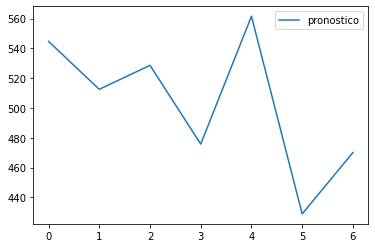

In [41]:
prediccion = pd.DataFrame(inverted)
prediccion.columns = ['pronostico']
prediccion.plot()

# Prediccion con datos actuales

In [42]:
# usaremos 14 dias que poseemos para predecir los 7 dias siguientes tras esto compararemos los resultados con los que
# poseemos para ver el grado de error

Dias_twt = df_twt['2020-5-11':'2020-5-24']
Dias_ine = df_ine['2020-5-11':'2020-5-24']
Dias_twt

,Viajes
2020-05-11,0
2020-05-12,0
2020-05-13,0
2020-05-14,0
2020-05-15,0
2020-05-16,0
2020-05-17,0
2020-05-18,0
2020-05-19,0
2020-05-20,0


# Preparamos los datos para el test

In [43]:
# cargamos el dataframe en la variable values
values_twt = Dias_twt.values
values_ine = Dias_ine.values

# convertimos los enteros en floats
values_twt = values_twt.astype('float32')
values_ine = values_ine.astype('float32')

# normalizamos los datos a escala de entre -1 y 1
values_twt =values_twt.reshape(-1, 1)
scaled_twt = scaler.fit_transform(values_twt)
values_ine =values_ine.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled_ine = scaler.fit_transform(values_ine)

# usamos la funcion definida previamente
reframed_twt = series_to_supervised(scaled_twt, look_back, 1)
reframed_ine = series_to_supervised(scaled_ine, look_back, 1)

# eliminamos la ultima columna pues es parte de lo que queremos hayar
reframed_twt.drop(reframed_twt.columns[[7]], inplace=True, axis=1)
reframed_ine.drop(reframed_ine.columns[[7]], inplace=True, axis=1)

#unimos los dataframes
reframed_ine.columns = ['var2(t-7)', 'var2(t-6)', 'var2(t-5)', 'var2(t-4)', 'var2(t-3)', 'var2(t-2)', 'var2(t-1)']
reframed = pd.concat([reframed_twt.iloc[:, 0], reframed_ine.iloc[:, 0]], axis=1)

for i in range(6):
    reframed = pd.concat([reframed, reframed_twt.iloc[:, i+1]], axis=1)
    reframed = pd.concat([reframed, reframed_ine.iloc[:, i+1]], axis=1)

#mostramos el set de entrenamiento
reframed.head(7)

,var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1)
7,-1.0,-0.162562,-1.0,-0.103448,-1.0,0.783251,-1.0,-0.093596,-1.0,-0.290641,-1.0,-0.024631,-1.0,-1.000000
8,-1.0,-0.103448,-1.0,0.783251,-1.0,-0.093596,-1.0,-0.290641,-1.0,-0.024631,-1.0,-1.000000,-1.0,0.073892
9,-1.0,0.783251,-1.0,-0.093596,-1.0,-0.290641,-1.0,-0.024631,-1.0,-1.000000,-1.0,0.073892,-1.0,-0.024631
10,-1.0,-0.093596,-1.0,-0.290641,-1.0,-0.024631,-1.0,-1.000000,-1.0,0.073892,-1.0,-0.024631,-1.0,0.290640
11,-1.0,-0.290641,-1.0,-0.024631,-1.0,-1.000000,-1.0,0.073892,-1.0,-0.024631,-1.0,0.290640,-1.0,0.172414
12,-1.0,-0.024631,-1.0,-1.000000,-1.0,0.073892,-1.0,-0.024631,-1.0,0.290640,-1.0,0.172414,-1.0,-0.044335
13,-1.0,-1.000000,-1.0,0.073892,-1.0,-0.024631,-1.0,0.290640,-1.0,0.172414,-1.0,-0.044335,-1.0,1.000000


In [44]:
values = reframed.values

#tomamos los valores para realizar el test
x_test = values[6:, :]

# reshape input to be 3D [samples, timesteps, features] - preguntar
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_test.shape)
x_test

(1, 1, 14)


array([[[-1.        , -1.        , -1.        ,  0.07389164,
         -1.        , -0.02463055, -1.        ,  0.29064035,
         -1.        ,  0.17241383, -1.        , -0.04433489,
         -1.        ,  1.        ]]], dtype=float32)

In [45]:
#en la linea 24 definimos la funcion para realizar el desplazamiento que se hara en el array cada prediccion pues para hacer
#la siguiente prediccion eliminamos el dia mas antiguo, desplazamos un lugar el resto de dias y añadimos el ultimo dia que
#se ha predecido, esto es por que para predecir un dia se usan los 7 dias previos, y que usaremos a continuación

# Realizamos la prediccion 

In [46]:
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-1.         -1.         -1.          0.07389164 -1.
   -0.02463055 -1.          0.29064035 -1.          0.17241383
   -1.         -0.04433489 -1.          1.        ]]]
[[[-1.         -1.          0.07389164 -1.         -0.02463055
   -1.          0.29064035 -1.          0.17241383 -1.
   -0.04433489 -1.          1.          0.04223163]]]
[[[-1.          0.07389164 -1.         -0.02463055 -1.
    0.29064035 -1.          0.17241383 -1.         -0.04433489
   -1.          1.          0.04223163  0.37492207]]]
[[[ 0.07389164 -1.         -0.02463055 -1.          0.29064035
   -1.          0.17241383 -1.         -0.04433489 -1.
    1.          0.04223163  0.37492207  0.08160354]]]
[[[-1.         -0.02463055 -1.          0.29064035 -1.
    0.17241383 -1.         -0.04433489 -1.          1.
    0.04223163  0.37492207  0.08160354 -0.48887423]]]
[[[-0.02463055 -1.          0.29064035 -1.          0.17241383
   -1.         -0.04433489 -1.          1.          0.04223163
    0.37492207  0.0816

# Re-Convertimos los resultados

In [47]:
adimen = [x for x in results]    
print(adimen)
inverted = scaler.inverse_transform(adimen)

#en nuestro problema no tienen sentido los decimales pues no se pueden hacer 0.5 viajes o 0.25 viajes
inverted = inverted.round()
inverted = inverted.astype(int)
inverted

[array([0.04223163], dtype=float32), array([0.37492207], dtype=float32), array([0.08160354], dtype=float32), array([-0.48887423], dtype=float32), array([-0.05823252], dtype=float32), array([-0.290012], dtype=float32), array([0.43409613], dtype=float32)]


array([[438],
       [472],
       [442],
       [384],
       [428],
       [404],
       [478]])

# Visualizamos el pronostico

<AxesSubplot:>

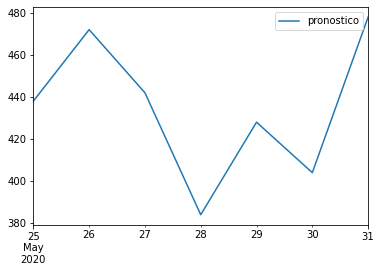

In [48]:
e_date = datetime.datetime.strptime('2020-05-31', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-05-25', '%Y-%m-%d')
delta = e_date - i_date

index_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    index_days.append(day)

prediccion = pd.DataFrame(inverted, index= index_days)
prediccion.columns = ['pronostico']
prediccion.plot()

In [49]:
datosReales = df_ine['2020-5-25':'2020-5-31']

compara = pd.concat([datosReales, prediccion], axis=1)
compara.columns = ['real', 'prediccion']
compara

,real,prediccion
2020-05-25,435,438
2020-05-26,421,472
2020-05-27,521,442
2020-05-28,442,384
2020-05-29,476,428
2020-05-30,433,404
2020-05-31,404,478


<AxesSubplot:>

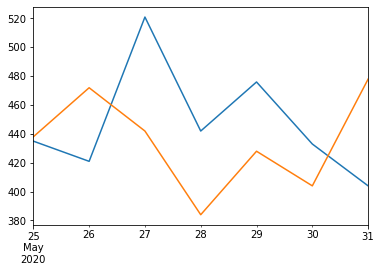

In [50]:
compara['real'].plot()
compara['prediccion'].plot()

In [51]:
# calculamos las metricas de error
testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion, datosReales)
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del test: 48.86 MAE
Resultado del test: 2976.57 MSE
Resultado del test: 54.56 RMSE
Resultado del test: 12.54 CVRMSE
Resultado del test: 11.19 MAPE


In [52]:
# calculamos las metricas de error para cada dia por separado
for i in range(7):
    testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion.values[i], datosReales.values[i])
    day = i + 1
    print('Resultado del test dia %d: %.2f MAE' % (day, testScore_MAE))
    print('Resultado del test dia %d: %.2f MSE' % (day, testScore_MSE))
    print('Resultado del test dia %d: %.2f RMSE' % (day, testScore_RMSE))
    print('Resultado del test dia %d: %.2f CVRMSE' % (day, testScore_CVRMSE))
    print('Resultado del test dia %d: %.2f MAPE \n' % (day, testScore_MAPE))

Resultado del test dia 1: 3.00 MAE
Resultado del test dia 1: 9.00 MSE
Resultado del test dia 1: 3.00 RMSE
Resultado del test dia 1: 0.68 CVRMSE
Resultado del test dia 1: 0.68 MAPE 

Resultado del test dia 2: 51.00 MAE
Resultado del test dia 2: 2601.00 MSE
Resultado del test dia 2: 51.00 RMSE
Resultado del test dia 2: 10.81 CVRMSE
Resultado del test dia 2: 10.81 MAPE 

Resultado del test dia 3: 79.00 MAE
Resultado del test dia 3: 6241.00 MSE
Resultado del test dia 3: 79.00 RMSE
Resultado del test dia 3: 17.87 CVRMSE
Resultado del test dia 3: 17.87 MAPE 

Resultado del test dia 4: 58.00 MAE
Resultado del test dia 4: 3364.00 MSE
Resultado del test dia 4: 58.00 RMSE
Resultado del test dia 4: 15.10 CVRMSE
Resultado del test dia 4: 15.10 MAPE 

Resultado del test dia 5: 48.00 MAE
Resultado del test dia 5: 2304.00 MSE
Resultado del test dia 5: 48.00 RMSE
Resultado del test dia 5: 11.21 CVRMSE
Resultado del test dia 5: 11.21 MAPE 

Resultado del test dia 6: 29.00 MAE
Resultado del test dia 6: 